In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
x = iris["data"][:,(2,3)]
y = iris["target"]

setosa_or_versicolor = (y==0) | (y==1)
x= x[setosa_or_versicolor]
y= y[setosa_or_versicolor]

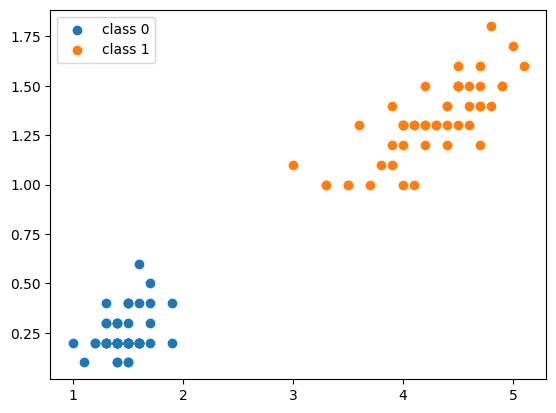

In [9]:
plt.scatter(x[:,0][y==0],x[:,1][y==0],label = "class 0")
plt.scatter(x[:,0][y==1],x[:,1][y==1],label = "class 1")
plt.legend()
plt.show()

In [13]:
#SVM classifier 
svm_clf = SVC(kernel="linear", C=1.0)
svm_clf.fit(x, y)

SVC(kernel='linear')

In [14]:
svm_clf.coef_  #weight terms

array([[1.1, 0.7]])

In [15]:
svm_clf.intercept_  # bias term

array([-3.27999997])

In [16]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:,0], svs[:,1], s=180, facecolors = '#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth = 2)
    plt.plot(x0, gutter_up, "k--", linewidth = 2)
    plt.plot(x0, gutter_down, "k-", linewidth = 2)

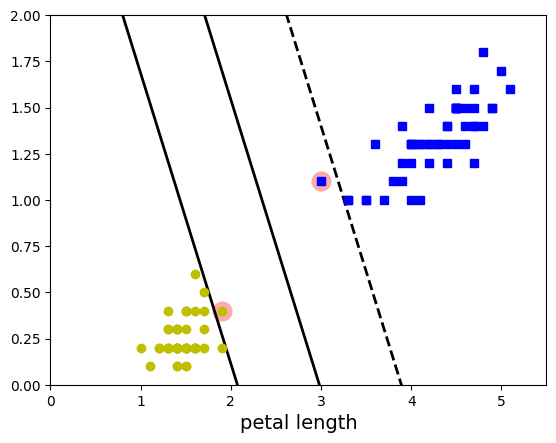

In [17]:
plot_svc_decision_boundary(svm_clf, 0,5.5)
plt.plot(x[:, 0][y==1], x[:,1][y==1], "bs")
plt.plot(x[:, 0][y==0], x[:,1][y==0], "yo")
plt.xlabel("petal length", fontsize =14)
plt.axis([0, 5.5, 0, 2])
plt.show()

